In [1]:
import geopandas as gpd

In [2]:
zip = "/media/muskrat/T7 Shield/eco_data/v3/native/IUCN/MAMMALS.zip"

df = gpd.read_file(zip)

In [3]:
df.head()

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,Shape_Leng,Shape_Area,geometry
0,20521,Sphaerias blanfordi,1,1,1,IUCN,2021,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PTEROPODIDAE,Sphaerias,LC,false,true,false,73.807852,42.797814,"MULTIPOLYGON (((108.14840 14.69404, 108.14300 ..."
1,41503,Ochotona turuchanensis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,...,LAGOMORPHA,OCHOTONIDAE,Ochotona,LC,false,true,false,99.526229,283.828988,"POLYGON ((90.70220 70.17444, 92.15923 70.16559..."
2,6290,Dasypus novemcinctus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CINGULATA,DASYPODIDAE,Dasypus,LC,false,true,false,589.422226,1560.551096,"POLYGON ((-86.11653 36.08533, -86.06112 36.066..."
3,6290,Dasypus novemcinctus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CINGULATA,DASYPODIDAE,Dasypus,LC,false,true,false,0.816174,0.026472,"POLYGON ((-61.75250 12.09651, -61.74632 12.114..."
4,6290,Dasypus novemcinctus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CINGULATA,DASYPODIDAE,Dasypus,LC,false,true,false,3.913018,0.400806,"POLYGON ((-61.03679 10.65591, -61.02736 10.616..."


In [4]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# put first row of df into a new dataframe
df2 = df.iloc[0:1]
df2

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,Shape_Leng,Shape_Area,geometry
0,20521,Sphaerias blanfordi,1,1,1,IUCN,2021,IUCN (International Union for Conservation of ...,None,None,...,CHIROPTERA,PTEROPODIDAE,Sphaerias,LC,false,true,false,73.807852,42.797814,"MULTIPOLYGON (((108.14840 14.69404, 108.14300 ..."


<AxesSubplot:>

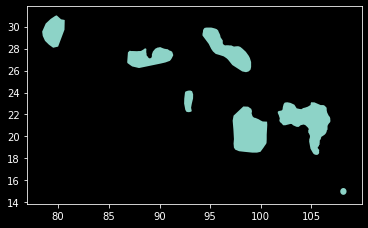

In [14]:
df.iloc[0:1].plot()

In [15]:
# list of column names
list(df)

['id_no',
 'sci_name',
 'presence',
 'origin',
 'seasonal',
 'compiler',
 'yrcompiled',
 'citation',
 'subspecies',
 'subpop',
 'source',
 'island',
 'tax_comm',
 'dist_comm',
 'generalisd',
 'legend',
 'kingdom',
 'phylum',
 'class',
 'order_',
 'family',
 'genus',
 'category',
 'marine',
 'terrestria',
 'freshwater',
 'Shape_Leng',
 'Shape_Area',
 'geometry']

In [16]:
# find rows where column 'sci_name' is 'Sciurus carolinensis'
df_sc = df[df["sci_name"] == "Sciurus carolinensis"]

In [17]:
df_sc

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,Shape_Leng,Shape_Area,geometry
8384,42462,Sciurus carolinensis,1,3,1,NatureServe,2008,International Union for Conservation of Nature...,None,None,...,RODENTIA,SCIURIDAE,Sciurus,LC,false,true,false,6.346814,0.322444,"MULTIPOLYGON (((-121.98770 36.97764, -121.9924..."
8385,42462,Sciurus carolinensis,1,1,1,IUCN,2008,International Union for Conservation of Nature...,None,None,...,RODENTIA,SCIURIDAE,Sciurus,LC,false,true,false,397.058775,433.032169,"MULTIPOLYGON (((-88.40150 30.35484, -88.39870 ..."


<AxesSubplot:>

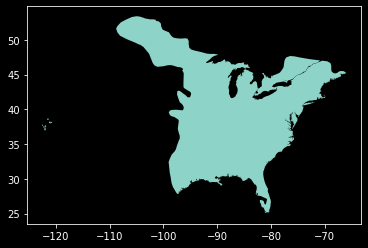

In [18]:
df_sc.plot()

In [ ]:
# filter by origin code 1(native) and 3 (introduced)
# filter by presence code 1 (present)

In [19]:
ecomap_loc = "/media/muskrat/T7 Shield/eco_data/ecomap_final/eco_map.geojson"

eco_map = gpd.read_file(ecomap_loc)

(25.0, 55.0)

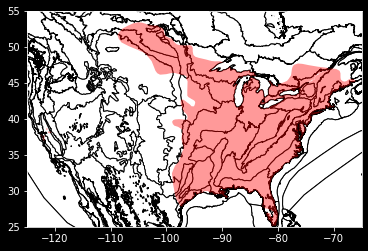

In [22]:
# plot ecomap and df on same map
base = eco_map.plot(color="white", edgecolor="black")
xmin, ymin, xmax, ymax = (-125, 25, -65, 55)

ax = df_sc.plot(ax=base, color="red", alpha=0.4)

# set the x and y limits of the plot to the specified bounding box coordinates
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plot the GeoDataFrame with the specified bounding box
# df.plot(ax=base, color='red', extent=[xmin, xmax, ymin, ymax])

# df.plot(ax=base, color='red')